In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

json = pd.read_json ('https://pomber.github.io/covid19/timeseries.json')

In [2]:
def plot_country(country):
    df = pd.json_normalize(json[country])
    diff = df[['confirmed']].diff()[1:]
    df = df[1:]
    discharged = df.recovered+df.deaths
    hospitalized = df.confirmed - discharged
    
    print(df.tail(1).to_string(index=False))
    print('new',diff.tail(1).to_string(index=False))

    plt.figure(figsize=(8,4))
    plt.plot(df.confirmed,label='confirmed')
    plt.plot(df.recovered,c='g',label='recovered')
    plt.plot(df.deaths,c='r',label='deaths')
    plt.plot(discharged,dashes=[2,2,6, 2],c='y',label='discharged')
    plt.plot(hospitalized,dashes=[2,2,6, 2],c='b',label='hospitalized')
    plt.title(country)
    plt.xlabel('day')
    plt.legend(loc='upper left')
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.scatter(df.confirmed,diff.confirmed)
    model = np.poly1d(np.polyfit(df.confirmed, diff.confirmed, 3))
    xp = np.linspace(df.confirmed.min(), df.confirmed.max(), 100)
    plt.plot(xp, model(xp), c='r')
    plt.title(country)
    plt.xlabel('confirmed')
    plt.ylabel('new confirmed per day')
    plt.show()
    
    print('discharged: ',discharged.iloc[-1])
    print('deaths: ',df.deaths.iloc[-1])
    print('%: ',(df.deaths.iloc[-1]/discharged.iloc[-1]*100))

    plt.figure(figsize=(8,4))
    plt.scatter(df.recovered+df.deaths,df.deaths)
    plt.title(country)
    plt.xlabel('discharged')
    plt.ylabel('deaths')
    plt.show()


In [3]:
# for c in json.columns:
#     print(c)

      date  confirmed  deaths  recovered
 2020-4-12       2551      38       1218
new  confirmed
      33.0


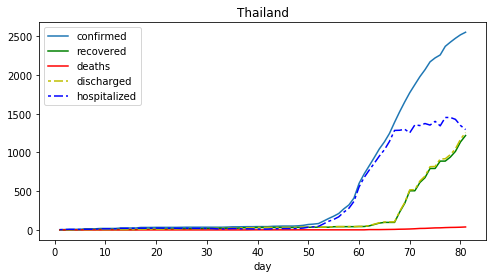

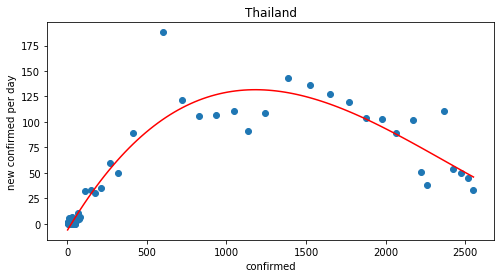

discharged:  1256
deaths:  38
%:  3.0254777070063694


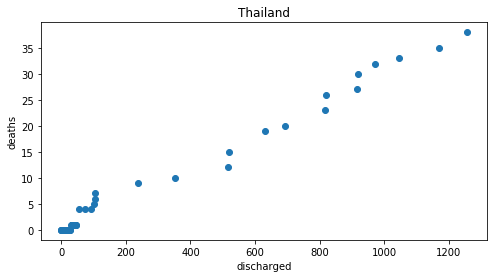

      date  confirmed  deaths  recovered
 2020-4-12       4683      76       2108
new  confirmed
     153.0


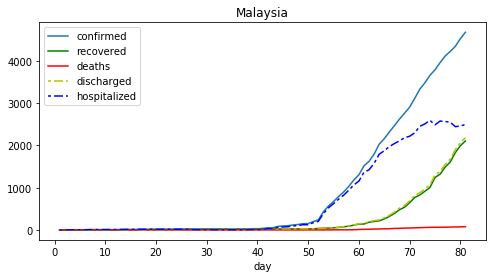

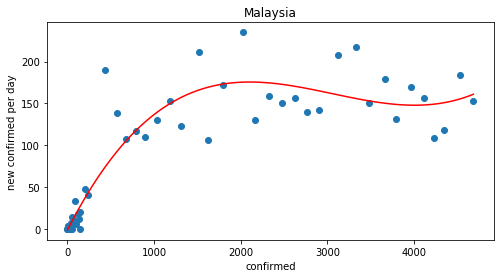

discharged:  2184
deaths:  76
%:  3.47985347985348


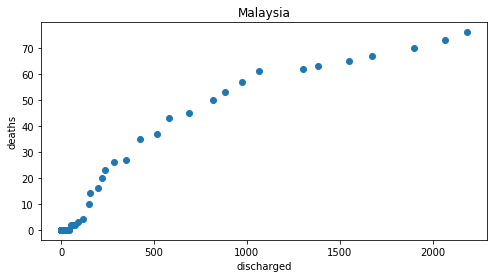

      date  confirmed  deaths  recovered
 2020-4-12       2532       8        560
new  confirmed
     233.0


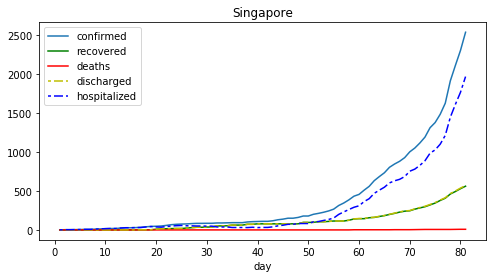

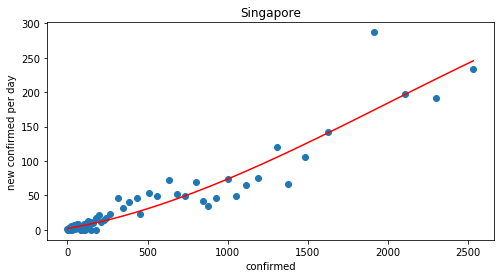

discharged:  568
deaths:  8
%:  1.4084507042253522


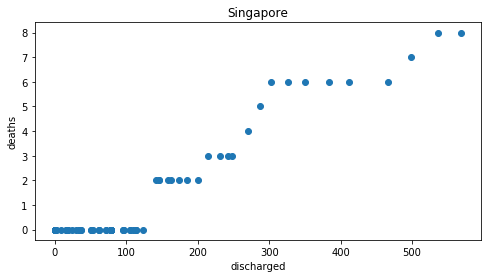

      date  confirmed  deaths  recovered
 2020-4-12       4241     373        359
new  confirmed
     399.0


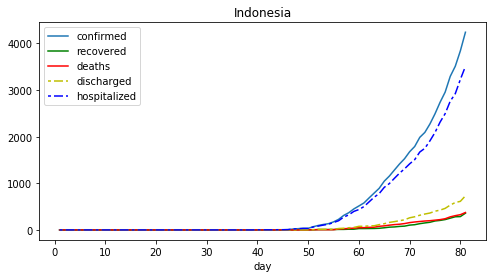

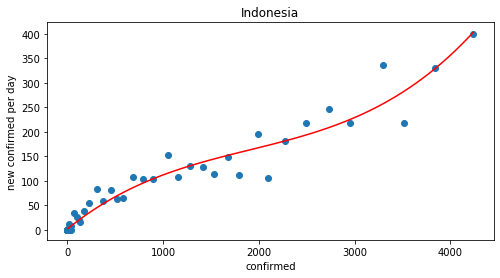

discharged:  732
deaths:  373
%:  50.95628415300546


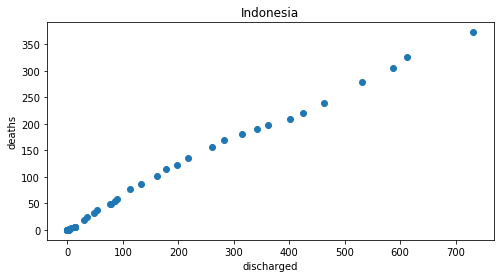

      date  confirmed  deaths  recovered
 2020-4-12     555313   22020      32988
new  confirmed
   28917.0


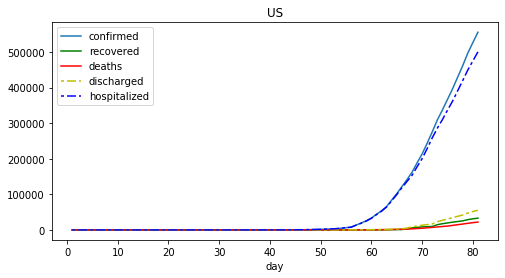

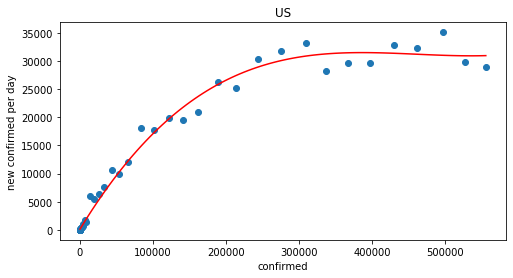

discharged:  55008
deaths:  22020
%:  40.0305410122164


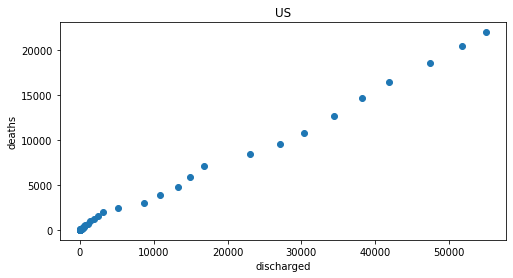

      date  confirmed  deaths  recovered
 2020-4-12      83134    3343      77956
new  confirmed
     120.0


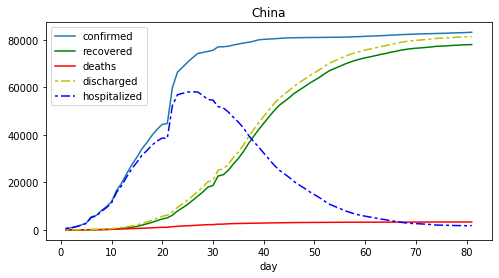

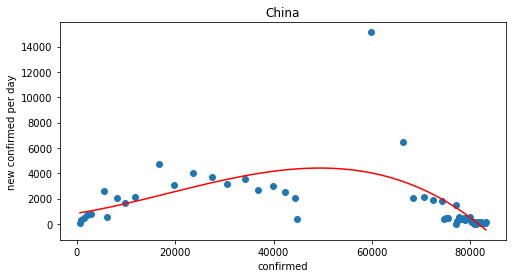

discharged:  81299
deaths:  3343
%:  4.1119816971918475


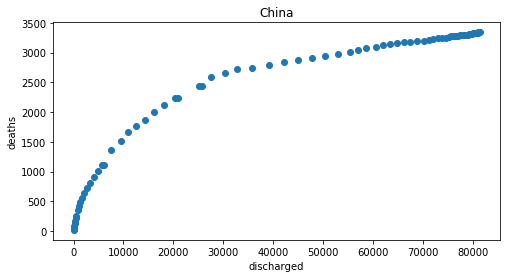

      date  confirmed  deaths  recovered
 2020-4-12      10512     214       7368
new  confirmed
      32.0


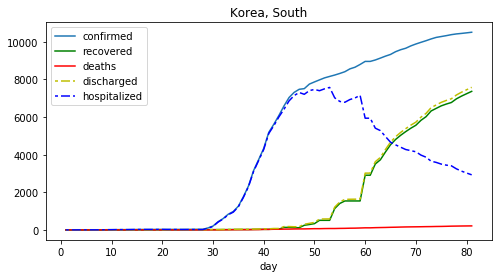

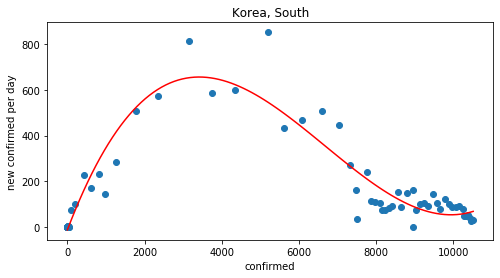

discharged:  7582
deaths:  214
%:  2.8224742811922976


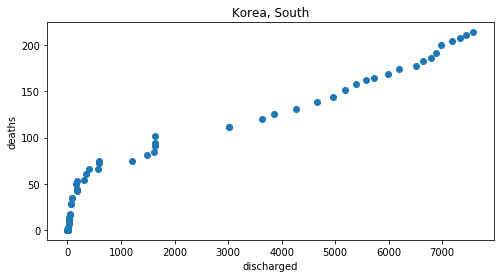

      date  confirmed  deaths  recovered
 2020-4-12     156363   19899      34211
new  confirmed
    4092.0


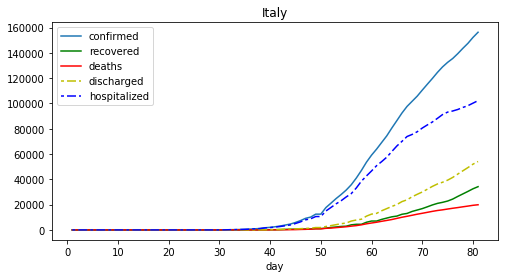

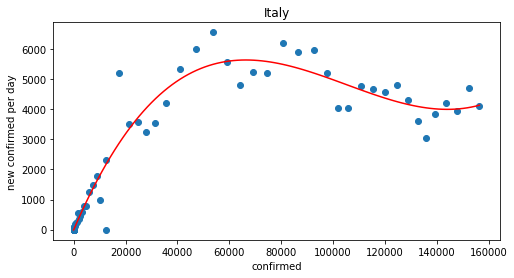

discharged:  54110
deaths:  19899
%:  36.77508778414341


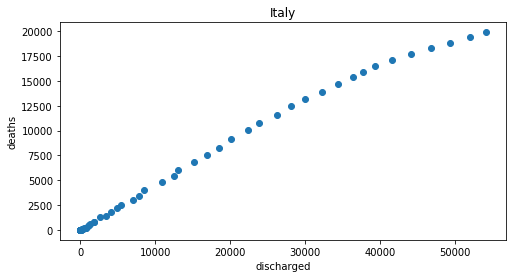

      date  confirmed  deaths  recovered
 2020-4-12     166831   17209      62391
new  confirmed
    3804.0


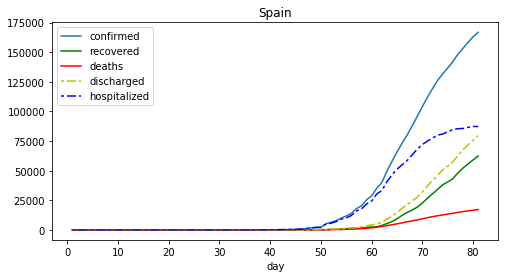

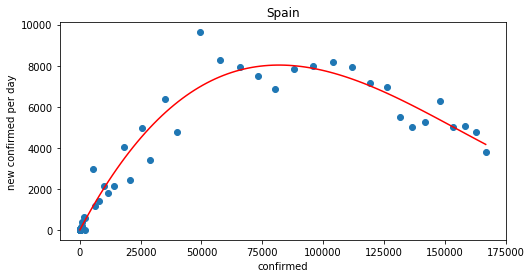

discharged:  79600
deaths:  17209
%:  21.61934673366834


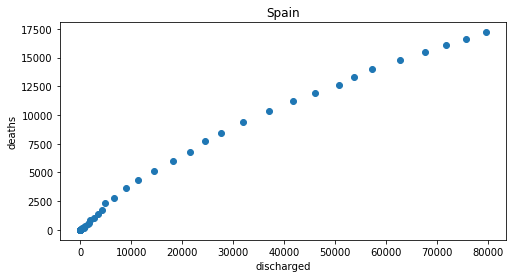

In [4]:
for c in ['Thailand','Malaysia','Singapore','Indonesia','US','China','Korea, South','Italy','Spain']:
    plot_country(c)
